In [126]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import torch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import math
%matplotlib ipympl

In [127]:
input_size = 3
hidden_size = 32
output_size = 3
num_epochs = 200
num_layers = 2
learning_rate = 0.001 
dropout = 0.2

In [128]:
training_set = 'round3'
TARGET_CTRL_PRES = './control_presets'
TEST_RESULT = '../../test_results'
track_name = 'triangle_lower_reverse'
Track_name = 'Triangle Lower'
target_file = TARGET_CTRL_PRES + '/LSTM_' + str(track_name) + '_' + str(training_set)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
# real_file = TEST_RESULT + '/' + str(training_set) + '' +'.csv'
real_file = TEST_RESULT + '/' + 't_lower_r_' + str(training_set) +'.csv'

In [129]:
# create an empty list to hold the sequences
target_data = []

# read the CSV file and split it into sequences
with open(target_file, newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == '':  # empty row indicates end of sequence
            continue
        else:
            # convert the row to a list of floats and append to the sequence
            row_float = [float(x) for x in row]
            target_data.append(row_float)

print('target_data size:', len(target_data), 'x', len(target_data[0]))

target_data size: 51 x 6


In [130]:
# create an empty list to hold the sequences
real_data = []

# read the CSV file and split it into sequences
with open(real_file, newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == '':  # empty row indicates end of sequence
            continue
        else:
            # convert the row to a list of floats and append to the sequence
            row_float = [float(x) for x in row]
            real_data.append(row_float)

print('real_data size:', len(real_data), 'x', len(real_data[0]))

real_data size: 51 x 6


In [131]:
# # calculate the difference of the first point between target and real
# diff = np.array(target_data[0][3:]) - np.array(real_data[0][3:])

# # add the difference to the real data
# for i in range(len(real_data)):
#     real_data[i][3:] = np.array(real_data[i][3:]) + diff

In [132]:
# calculate the mean error
error = 0
for i in range(len(target_data)):
    error += np.linalg.norm(np.array(target_data[i][3:6]) - np.array(real_data[i][3:6]))
error /= len(target_data)
print('Position mean error:', error)

# calculate the error for each axis
error = []
for i in range(len(target_data)):
    error.append(np.array(target_data[i][3:6]) - np.array(real_data[i][3:6]))
error = np.array(error)
print('Position error for each axis:', np.mean(error, axis=0))

# calculate the max error
error = 0
for i in range(len(target_data)):
    error = max(error, np.linalg.norm(np.array(target_data[i][3:6]) - np.array(real_data[i][3:6])))
print('Position max error:', error)

# calculate the max error for each axis
error = []
for i in range(len(target_data)):
    error.append(np.abs(np.array(target_data[i][3:6]) - np.array(real_data[i][3:6])))
error = np.array(error)
print('Position max error for each axis:', np.max(error, axis=0))

# calculate the RMSE
error = 0
for i in range(len(target_data)):
    error += (np.linalg.norm(np.array(target_data[i][3:6]) - np.array(real_data[i][3:6])))**2
error /= len(target_data)
error = np.sqrt(error)
print('Position RMSE:', error)

Position mean error: 11.893934721839555
Position error for each axis: [-3.83979092  2.46129818  3.28116486]
Position max error: 31.722338172309883
Position max error for each axis: [22.876265 13.454922 19.719198]
Position RMSE: 13.485452530926686


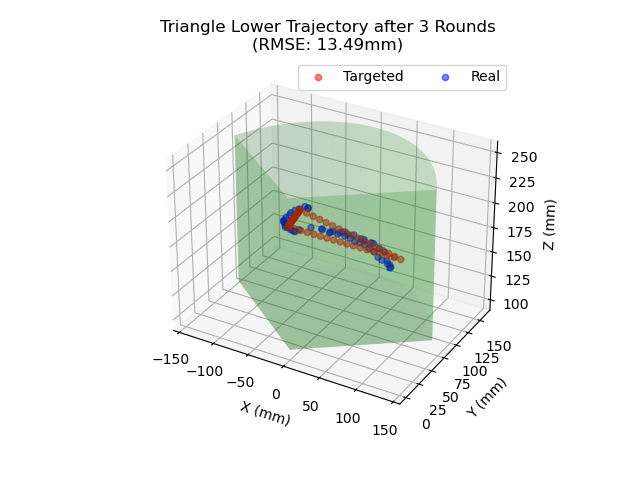

In [133]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([x[3] for x in target_data], [-x[4] for x in target_data], 
                     [x[5] for x in target_data], alpha=0.5, c='r', marker='o', label='Targeted')
ax.scatter([x[3] for x in real_data], [-x[4] for x in real_data], 
                     [x[5] for x in real_data], alpha=0.5, c='b', marker='o', label='Real')

# Create a 1/3 cylinder
radius = 160
height_z = 150
center_x = 0
center_y = 0
center_z = 100

# Circle parameters
circle_radius = radius
circle_angle = np.radians(120) # 120 degrees in radians
circle_start_angle = np.radians(240) # Start angle of the circle, 240 degrees in radians

# Plot the cylinder
z = np.linspace(center_z, center_z+height_z, 50)
theta = np.linspace(7*np.pi/6, 11*np.pi/6, 50)
theta_grid, z_grid=np.meshgrid(theta, z)
x_grid = radius*np.cos(theta_grid) + center_x
y_grid = radius*np.sin(theta_grid) + center_y
ax.plot_surface(x_grid, -y_grid, z_grid, alpha=0.2,color='green')

# Plot the circle
theta = np.linspace(0, np.pi/2, 100)
phi = np.linspace(7*np.pi/6, 11*np.pi/6, 100)
theta, phi = np.meshgrid(theta, phi)
x = radius*np.sin(theta)*np.cos(phi)
y = radius*np.sin(theta)*np.sin(phi)
z = np.zeros_like(x)+center_z
ax.plot_surface(x, -y, z, alpha=0.2,color='green')

# Plot the rectangle
# Define four points as vertices of the rectangle in 3D space
point1 = [0, 0, 100]
point2 = [radius*np.cos(np.pi/6), radius*np.sin(np.pi/6), 100]
point3 = [radius*np.cos(np.pi/6), radius*np.sin(np.pi/6), 100+height_z]
point4 = [0, 0, 100+height_z]
x = [point1[0], point2[0], point3[0], point4[0]]
y = [point1[1], point2[1], point3[1], point4[1]]
z = [point1[2], point2[2], point3[2], point4[2]]

# Draw square plane1
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts, alpha=.2, facecolor='green'))

# Draw square plane2
x = [-point1[0], -point2[0], -point3[0], -point4[0]]

verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts, alpha=.2, facecolor='green'))

# Normalize the axes to achieve equal scaling
ax.set_box_aspect([4,3,3])

# Add labels to the plot
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.set_title(Track_name + ' Trajectory after 3 Rounds\n(RMSE: ' + str(round(error, 2)) + 'mm)')
ax.legend(ncols=2)
plt.show()

# save the figure
# fig.savefig(FIGURE_PATH + '/LSTM_' + str(track_name) + '_' + str(training_set)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'.png')

In [134]:
# calculate the max error for each way
error = []
for i in range(len(target_data)):
    error.append(np.array(target_data[i][0:3]) - np.array(real_data[i][0:3]))
error = np.array(error)
print('Pressure max error for each way:', np.max(np.abs(error), axis=0))

# calculate the mean error per way
error = []
for i in range(len(target_data)):
    error.append(np.array(target_data[i][0:3]) - np.array(real_data[i][0:3]))
error = np.array(error)
print('Pressure mean error for each way:', np.mean(np.abs(error), axis=0))
print('Pressure mean error per way:', np.mean(np.mean(np.abs(error))))

Pressure max error for each way: [1.14230793 1.21457523 1.17081277]
Pressure mean error for each way: [0.41653186 0.34855325 0.28351399]
Pressure mean error per way: 0.34953303154545745


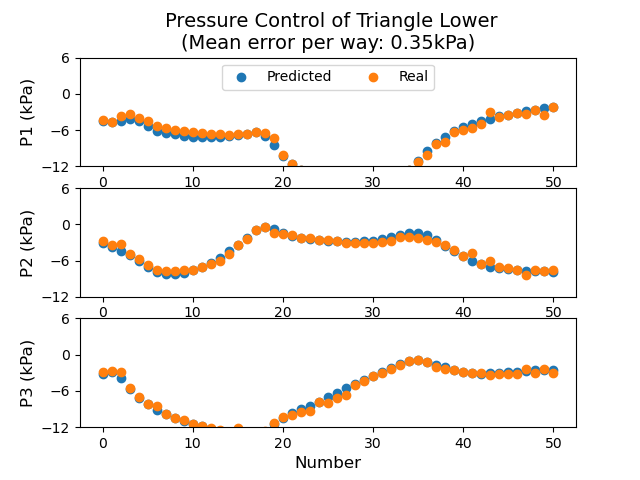

In [135]:
t = np.arange(len(target_data))
fig = plt.figure()
plt.subplot(3,1,1)
plt.title(' Pressure Control of ' + Track_name + '\n(Mean error per way: ' + str(round(np.mean(np.mean(np.abs(error))), 2)) + 'kPa)', fontsize=14)
plt.scatter(t,[x[0] for x in target_data],label='Predicted')
plt.scatter(t,[x[0] for x in real_data],label='Real')
plt.ylim(-12, 6)
plt.yticks(np.arange(-12, 12, 6))
plt.legend(loc='upper center', fontsize=10, ncol=2)
plt.tick_params(labelsize=10)
plt.ylabel('P1 (kPa)', fontsize=12)
plt.subplot(3,1,2)
plt.scatter(t,[x[1] for x in target_data],label='Pressure2 predicted')
plt.scatter(t,[x[1] for x in real_data],label='Pressure2 real')
plt.ylabel('P2 (kPa)', fontsize=12)
plt.tick_params(labelsize=10)
plt.yticks(np.arange(-12, 12, 6))
plt.ylim(-12, 6)
plt.subplot(3,1,3)
plt.scatter(t,[x[2] for x in target_data],label='Pressure3 predicted')
plt.scatter(t,[x[2] for x in real_data],label='Pressure3 real')
plt.tick_params(labelsize=10)
plt.ylim(-12, 6)
plt.ylabel('P3 (kPa)', fontsize=12)
plt.yticks(np.arange(-12, 12, 6))
plt.xlabel('Number', fontsize=12)
plt.show()
# fig.savefig("output.png", dpi=300, format="png")

In [136]:
track_name_1 = 'quadrilateral_lower'
track_name_2 = 'quadrilateral_middle'
track_name_3 = 'triangle_lower'
track_name_4 = 'triangle_middle'
Track_name_1 = 'Quadrilateral Lower'
Track_name_2 = 'Quadrilateral Middle'
Track_name_3 = 'Triangle Lower'
Track_name_4 = 'Triangle Middle'

TRAINING_SET_x4 = '../../training_sets/No1and2x4.csv'
training_set_x4 = 'No1and2x4'
target_file_x4_1 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_1) + '_' + str(training_set_x4)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
target_file_x4_2 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_2) + '_' + str(training_set_x4)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
target_file_x4_3 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_3) + '_' + str(training_set_x4)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
target_file_x4_4 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_4) + '_' + str(training_set_x4)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
real_file_x4_1 = TEST_RESULT + '/' + str(track_name_1) + '_x4' +'.csv'
real_file_x4_2 = TEST_RESULT + '/' + str(track_name_2) + '_x4' +'.csv'
real_file_x4_3 = TEST_RESULT + '/' + str(track_name_3) + '_x4' +'.csv'
real_file_x4_4 = TEST_RESULT + '/' + str(track_name_4) + '_x4' +'.csv'

In [137]:
TRAINING_SET_x12 = '../../training_sets/No1and2x12.csv'
training_set_x12 = 'No1and2x12'
target_file_x12_1 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_1) + '_' + str(training_set_x12)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
target_file_x12_2 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_2) + '_' + str(training_set_x12)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
target_file_x12_3 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_3) + '_' + str(training_set_x12)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
target_file_x12_4 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_4) + '_' + str(training_set_x12)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
real_file_x12_1 = TEST_RESULT + '/' + str(track_name_1) + '_x12' +'.csv'
real_file_x12_2 = TEST_RESULT + '/' + str(track_name_2) + '_x12' +'.csv'
real_file_x12_3 = TEST_RESULT + '/' + str(track_name_3) + '_x12' +'.csv'
real_file_x12_4 = TEST_RESULT + '/' + str(track_name_4) + '_x12' +'.csv'

In [138]:
TRAINING_SET_x22 = '../../training_sets/No1and2x22.csv'
training_set_x22 = 'No1and2x22'
target_file_x22_1 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_1) + '_' + str(training_set_x22)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
target_file_x22_2 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_2) + '_' + str(training_set_x22)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
target_file_x22_3 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_3) + '_' + str(training_set_x22)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
target_file_x22_4 = TARGET_CTRL_PRES + '/LSTM_' + str(track_name_4) + '_' + str(training_set_x22)+'_'+str(learning_rate)+'_'+str(hidden_size)+'_'+str(num_epochs)+'_'+str(num_layers)+'_' +str(dropout)+'.csv'
real_file_x22_1 = TEST_RESULT + '/' + str(track_name_1) + '_x22' +'.csv'
real_file_x22_2 = TEST_RESULT + '/' + str(track_name_2) + '_x22' +'.csv'
real_file_x22_3 = TEST_RESULT + '/' + str(track_name_3) + '_x22' +'.csv'
real_file_x22_4 = TEST_RESULT + '/' + str(track_name_4) + '_x22' +'.csv'

In [139]:
target_files = [target_file_x4_1, target_file_x4_2, target_file_x4_3, target_file_x4_4, target_file_x12_1, target_file_x12_2, target_file_x12_3, target_file_x12_4, target_file_x22_1, target_file_x22_2, target_file_x22_3, target_file_x22_4]
real_files = [real_file_x4_1, real_file_x4_2, real_file_x4_3, real_file_x4_4, real_file_x12_1, real_file_x12_2, real_file_x12_3, real_file_x12_4, real_file_x22_1, real_file_x22_2, real_file_x22_3, real_file_x22_4]

In [140]:
# create an empty list to hold the sequences
target_data = []

# read the CSV file and split it into sequences
for file in target_files:
    with open(file, newline='') as f:
        reader = csv.reader(f)
        file_data = []
        for row in reader:
            if row[0] == '':  # empty row indicates end of sequence
                continue
            else:
                # convert the row to a list of floats and append to the sequence
                row_float = [float(x) for x in row]
                file_data.append(row_float)
        target_data.append(file_data)

print('target_data size:', len(target_data), 'x', len(target_data[0]), 'x', len(target_data[0][0]))

target_data size: 12 x 48 x 6


In [141]:
# create an empty list to hold the sequences
real_data = []

# read the CSV file and split it into sequences
for file in real_files:
    with open(file, newline='') as f:
        reader = csv.reader(f)
        file_data = []
        for row in reader:
            if row[0] == '':  # empty row indicates end of sequence
                continue
            else:
                # convert the row to a list of floats and append to the sequence
                row_float = [float(x) for x in row]
                file_data.append(row_float)
        real_data.append(file_data)

print('real_data size:', len(real_data), 'x', len(real_data[0]), 'x', len(real_data[0][0]))

real_data size: 12 x 48 x 6


In [142]:
# # calculate the difference of the first point between target and real
# diff = []
# for i in range(len(target_data)):
#     diff = np.array(target_data[i][0][3:]) - np.array(real_data[i][0][3:])

# # add the difference to the real data
# for i in range(len(real_data)):   
#     for j in range(len(real_data[i])):
#         real_data[i][j][3:] = np.array(real_data[i][j][3:]) + diff

In [143]:
# calculate the mean errors
mean_errors = []
for i in range(len(target_data)):
    mean_error = 0
    for j in range(len(target_data[i])):
        mean_error += np.linalg.norm(np.array(target_data[i][j][3:6]) - np.array(real_data[i][j][3:6]))
    mean_error /= len(target_data[i])
    mean_errors.append(mean_error)

print('mean_errors:', mean_errors)

# calculate the RMSEs
rmses = []
for i in range(len(target_data)):
    rmse = 0
    for j in range(len(target_data[i])):
        rmse += (np.linalg.norm(np.array(target_data[i][j][3:6]) - np.array(real_data[i][j][3:6])))**2
    rmse /= len(target_data[i])
    rmse = np.sqrt(rmse)
    rmses.append(rmse)

print('rmses:', rmses)

mean_errors: [28.845563631638004, 33.74878628773331, 28.04410664708448, 36.66711311325934, 32.21671308522071, 36.37197144807186, 29.085600469250036, 32.3718938025152, 10.840928584234566, 22.702471143423267, 18.075257555715243, 13.679045084580673]
rmses: [30.603767563111692, 39.71399115671717, 29.88036994490484, 40.91686709168041, 33.02364016385618, 37.54992044158686, 31.616269386040084, 33.24823617267704, 11.470727255960792, 23.64600135515931, 20.762348853306975, 15.036028278682695]


In [144]:
track1_mean_error = (mean_errors[0], mean_errors[4], mean_errors[8])
track2_mean_error = (mean_errors[1], mean_errors[5], mean_errors[9])
track3_mean_error = (mean_errors[2], mean_errors[6], mean_errors[10])
track4_mean_error = (mean_errors[3], mean_errors[7], mean_errors[11])

track1_rmse = (rmses[0], rmses[4], rmses[8])
track2_rmse = (rmses[1], rmses[5], rmses[9])
track3_rmse = (rmses[2], rmses[6], rmses[10])
track4_rmse = (rmses[3], rmses[7], rmses[11])

C:\Users\27256\AppData\Local\Temp\ipykernel_1472356\2575463316.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


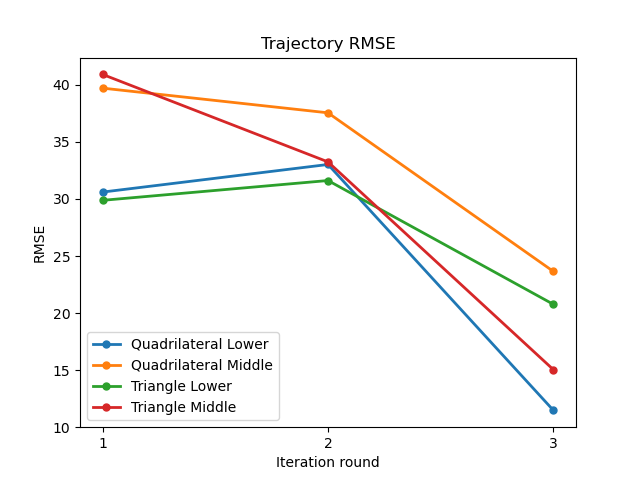

In [145]:
# plot the RMSEs
plt.figure()
plt.plot(track1_rmse, marker='.', markersize=10, linewidth=2, label=Track_name_1)
plt.plot(track2_rmse, marker='.', markersize=10, linewidth=2, label=Track_name_2)
plt.plot(track3_rmse, marker='.', markersize=10, linewidth=2, label=Track_name_3)
plt.plot(track4_rmse, marker='.', markersize=10, linewidth=2, label=Track_name_4)
# set the value of xticks
plt.xticks(np.arange(3), ('1', '2', '3'))
plt.title('Trajectory RMSE')
plt.xlabel('Iteration round', fontsize=10)
plt.ylabel('RMSE', fontsize=10)
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
plt.show()